<a href="https://colab.research.google.com/github/arturbernardo/eficacia_vacina_covid19/blob/main/eficiencia_vacinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -U "Mozilla" -O mortalidade_2021.csv https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/Mortalidade_Geral_2021.csv

--2024-02-10 22:59:18--  https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/Mortalidade_Geral_2021.csv
Resolving s3.sa-east-1.amazonaws.com (s3.sa-east-1.amazonaws.com)... 16.12.2.12, 52.95.165.43, 16.12.0.68, ...
Connecting to s3.sa-east-1.amazonaws.com (s3.sa-east-1.amazonaws.com)|16.12.2.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632732700 (603M) [text/csv]
Saving to: ‘mortalidade_2021.csv’

mortalidade_2021.cs 100%[===================>] 603.42M  5.36MB/s    in 82s     

2024-02-10 23:00:41 (7.37 MB/s) - ‘mortalidade_2021.csv’ saved [632732700/632732700]



In [68]:
!pip install datetime

In [69]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [70]:
path = "/content/mortalidade_2021.csv"

In [71]:
def converter_data(data):
    data_str = str(int(data)).zfill(8)

    dia = int(data_str[:2])
    mes = int(data_str[2:4])
    ano = int(data_str[4:])

    return pd.to_datetime(f"{ano}-{mes}-{dia}")

converter_data(18061962.0)

Timestamp('1962-06-18 00:00:00')

In [54]:
# def calculate_idade(data):
#   hoje = datetime.today()
#   return (hoje - converter_data(primeiras_linhas['DTNASC'])).astype('<m8[Y]')

In [ ]:
# df = pd.read_csv('seu_dataframe.csv', converters={'ColunaExistente': lambda x: str(x).upper()})


In [72]:
df = pd.read_csv(path, engine="python", sep=";",
                 converters={
                     "DTNASC": converter_data,
                     "DTOBITO": converter_data
                     })

In [73]:
dfA = df

In [74]:
dfA['IDADE'] = (df['DTOBITO'] - df['DTNASC']).astype('<m8[Y]')

In [75]:
dfA.shape

(1832649, 87)

In [ ]:
pd.set_option('display.max_rows', 200)
dfA.iloc[0]

In [77]:
dfA['CAUSABAS'].unique()

array(['B342', 'C480', 'J128', ..., 'X278', 'X047', 'E012'], dtype=object)

In [78]:
just_covid_df = dfA[dfA['CAUSABAS'].str.contains('B34')]

just_covid_df.shape

(425218, 87)

In [79]:
just_covid_df.to_csv('just_covid_df.csv', index=False)

In [14]:
# primeiras_linhas = just_covid_df.head(10)

# primeiras_linhas.to_csv('primeiras_linhas.csv', index=False)

In [ ]:
# primeiras_linhas

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# primeiras_linhas = pd.read_csv("primeiras_linhas.csv")
# df_ordenado = primeiras_linhas.sort_values(by='DTOBITO')
# df_ordenado

In [80]:
df_agrupado = just_covid_df.groupby('DTOBITO')
df_agrupado.size()

DTOBITO
2021-01-01     936
2021-01-02     989
2021-01-03     972
2021-01-04     951
2021-01-05    1020
              ... 
2021-12-27      93
2021-12-28     101
2021-12-29      97
2021-12-30     128
2021-12-31      92
Length: 365, dtype: int64

In [81]:
mortalidade_dia_idade = just_covid_df.groupby(['DTOBITO', 'IDADE']).size()
mortalidade_dia_idade

DTOBITO     IDADE
2021-01-01  0.0      2
            16.0     1
            17.0     1
            18.0     1
            25.0     1
                    ..
2021-12-31  92.0     1
            94.0     1
            95.0     2
            97.0     1
            98.0     1
Length: 27581, dtype: int64

In [82]:
mortalidade_dia = mortalidade_dia_idade.groupby(level=0).sum()
mortalidade_dia

DTOBITO
2021-01-01     935
2021-01-02     989
2021-01-03     972
2021-01-04     951
2021-01-05    1020
              ... 
2021-12-27      93
2021-12-28     101
2021-12-29      97
2021-12-30     128
2021-12-31      92
Length: 365, dtype: int64

In [83]:
filtro_idade = just_covid_df[just_covid_df['IDADE'] >= 80]

df_maior_80 = filtro_idade.groupby('DTOBITO')['IDADE'].size()

print(df_maior_80)

DTOBITO
2021-01-01    274
2021-01-02    267
2021-01-03    274
2021-01-04    280
2021-01-05    282
             ... 
2021-12-27     31
2021-12-28     17
2021-12-29     29
2021-12-30     32
2021-12-31     26
Name: IDADE, Length: 365, dtype: int64


In [ ]:
# for index, todos, m80 in zip(mortalidade_dia.index, mortalidade_dia, df_maior_80):
#     percentual = (m80 * 100) / todos
#     print(index, percentual, "m80", m80, "todos:", todos)


In [118]:
data_to_plot = []
percentual_to_plot = []
window_size = 3

for index, todos, m80 in zip(mortalidade_dia.index, mortalidade_dia, df_maior_80):
    percentual = (m80 * 100) / todos
    # print(index, percentual, "m80", m80, "todos:", todos)
    data_to_plot.append(index)
    percentual_to_plot.append(percentual)

# smothed_percentual_to_plot = (np.convolve(percentual_to_plot, np.ones(window_size)/window_size, mode='valid'))
smothed_percentual_to_plot = np.convolve(percentual_to_plot, np.ones(window_size)/window_size, mode='full')[:len(percentual_to_plot)]



In [ ]:
smothed_percentual_to_plot

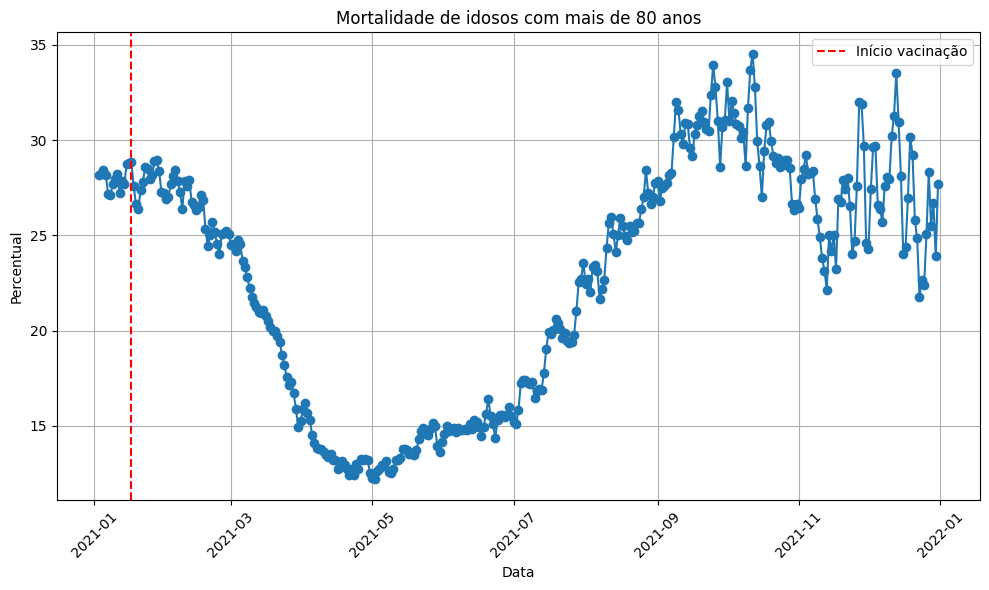

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(data_to_plot[2:], smothed_percentual_to_plot[2:], marker='o', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Percentual')
plt.title('Mortalidade de idosos com mais de 80 anos')

#adicionar linha inicio vacinacao
data_vertical = pd.Timestamp('2021-01-17')
plt.axvline(x=data_vertical, color='red', linestyle='--', label='Início vacinação')
plt.legend()


# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
filtro_idade = just_covid_df[(just_covid_df['IDADE'] >= 70) & (just_covid_df['IDADE'] < 80)]

df_maior_70 = filtro_idade.groupby('DTOBITO')['IDADE'].size()

print(df_maior_70)

In [126]:
data_to_plot = []
percentual_to_plot = []
window_size = 3

for index, todos, m70 in zip(mortalidade_dia.index, mortalidade_dia, df_maior_70):
    percentual = (m70 * 100) / todos
    # print(index, percentual, "m70", m70, "todos:", todos)
    data_to_plot.append(index)
    percentual_to_plot.append(percentual)

# smothed_percentual_to_plot = (np.convolve(percentual_to_plot, np.ones(window_size)/window_size, mode='valid'))
smothed_percentual_to_plot = np.convolve(percentual_to_plot, np.ones(window_size)/window_size, mode='full')[:len(percentual_to_plot)]



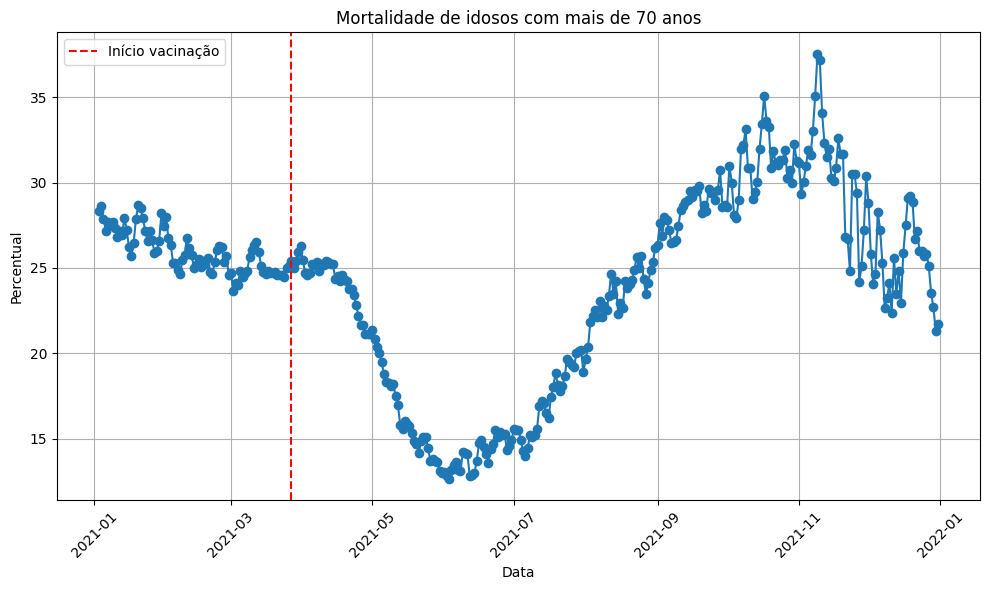

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(data_to_plot[2:], smothed_percentual_to_plot[2:], marker='o', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Percentual')
plt.title('Mortalidade de idosos com mais de 70 anos')

#adicionar linha inicio vacinacao
data_vertical = pd.Timestamp('2021-03-27')
plt.axvline(x=data_vertical, color='red', linestyle='--', label='Início vacinação')
plt.legend()


# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()